In [52]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle(
            (self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(
            number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment),
                             (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(
                        neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * \
            self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize=12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize=12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer ' +
                        str(layerType), fontsize=12)


class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons,
                      self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers) - 1:
                i = -1
            layer.draw(i)
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title('Neural Network architecture', fontsize=15)
        pyplot.show()


class DrawNN():
    def __init__(self, neural_network):
        self.neural_network = neural_network

    def draw(self):
        widest_layer = max(self.neural_network)
        network = NeuralNetwork(widest_layer)
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [3]:
import numpy as np

In [16]:
np.linspace(1, 1*5, 10, endpoint=True)

array([ 1.        ,  1.44444444,  1.88888889,  2.33333333,  2.77777778,
        3.22222222,  3.66666667,  4.11111111,  4.55555556,  5.        ])

In [74]:
plt.Circle?

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, atan

NEURON_RADIUS = 0.5
DISTANCE_BETWEEN_LAYERS = 6
DISTANCE_BETWEEN_NEURONS = 2


def draw_layer_text(layerType, widest, y):
    x_text = (widest + 1) * DISTANCE_BETWEEN_NEURONS
    if layerType == 0:
        plt.text(x_text, y, 'Input Layer', fontsize=12)
    elif layerType == -1:
        plt.text(x_text, y, 'Output Layer', fontsize=12)
    else:
        plt.text(x_text, y, 'Hidden Layer ' + str(layerType), fontsize=12)


def draw_layer(x_neurons, widest, y):
    for (i, l), yl in zip(enumerate(x_neurons), y):
        if i == len(y) - 1:
            i = -1
        draw_layer_text(i, widest, yl)
        for xn in l:
            circle = plt.Circle((xn, yl), radius=NEURON_RADIUS, fill=False)
            plt.gca().add_patch(circle)


def draw_neuron_lines(x_neurons, y_layers):
    for i, (old_y, new_y) in enumerate(zip(y_layers[:-1], y_layers[1:])):
        for old_x in x_neurons[:-1][i]:
            for new_x in x_neurons[1:][i]:
                angle = atan((new_x - old_x) / float(new_y - old_y))
                x_adjustment = NEURON_RADIUS * sin(angle)
                y_adjustment = NEURON_RADIUS * cos(angle)
                line = plt.Line2D((old_x + x_adjustment, new_x - x_adjustment),
                                  (old_y + y_adjustment, new_y - y_adjustment))
                plt.gca().add_line(line)

                
def calc_neuron_positions(layers, widest):
    x_neurons = []
    for l in layers:
        start = DISTANCE_BETWEEN_NEURONS * (widest - l) / 2
        end = start + DISTANCE_BETWEEN_NEURONS * (l - 1)
        x_neurons.append(np.linspace(start, end, l, endpoint=True))
    return np.array(x_neurons)


def draw_neural_network(layers):
    widest = max(layers)
    y_layers = np.arange(len(layers)) * DISTANCE_BETWEEN_LAYERS
    x_neurons = calc_neuron_positions(layers, widest)

    plt.figure(figsize=(12.4, 10))

    draw_neuron_lines(x_neurons, y_layers)
    draw_layer(x_neurons, widest, y_layers)

    plt.axis('scaled')
    plt.axis('off')
    plt.title('Neural Network architecture', fontsize=15)
    plt.show()

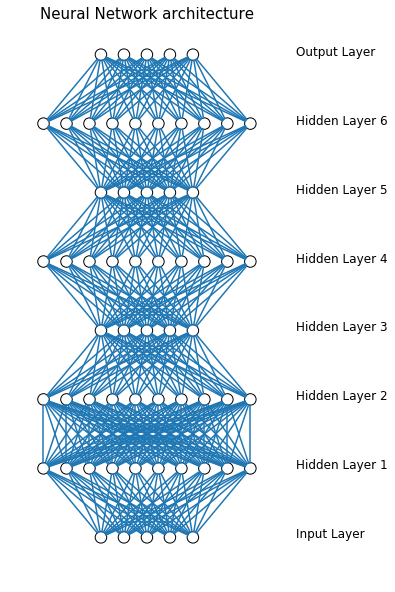

In [115]:
draw_neural_network([5,10,10,5, 10, 5, 10, 5])

In [109]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

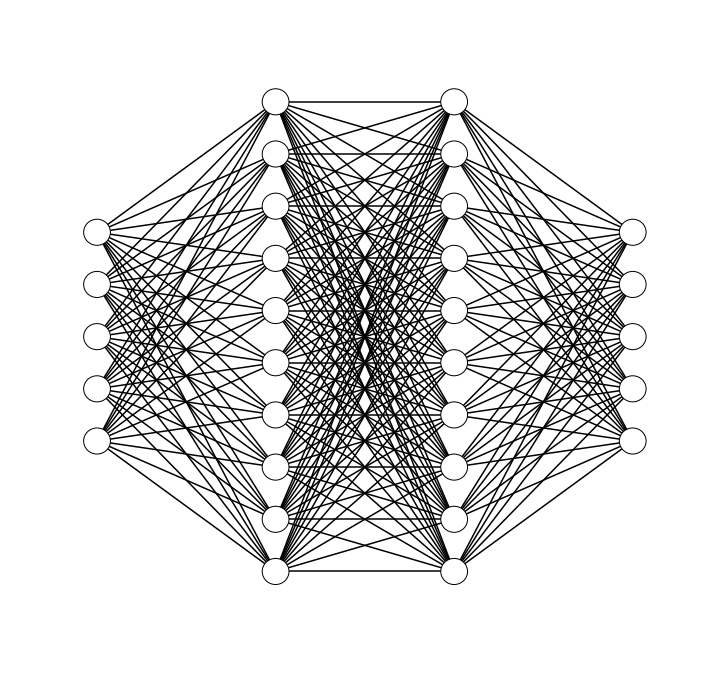

In [113]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 10, 10, 5])

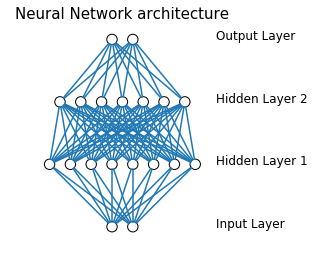

In [57]:
n = DrawNN([2,8,7,2])
n.draw()